In [194]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
from rake_nltk import Rake
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
df = pd.read_csv('foodData.csv')

In [147]:
df.head()

,UserID,Gender,Age Group,Top 6 most preferred dishes,laksa,Chili Crab,Char Kway Teow,hainanese chicken rice,Sliced Fish Soup,Fish and Chips,...,Roti Prata,Black Pepper Crab,Roti John,Cereal Prawn,Beef Kway Teow,Katong laksa,Sambal Stingray,Crab Bee Hoon Soup,Satay,sum
0,1,Female,15 - 24,"Sliced Fish Soup, Japanese Bento,Curry laksa, ...",0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,6
1,2,Male,15 - 24,"Hainanese Chicken Rice, Fish and Chips, Japane...",0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,6
2,3,Male,15 - 24,"Char Kway Teow, Hainanese Chicken Rice, Fish a...",0,0,1,1,0,1,...,1,0,1,0,0,0,0,0,0,6
3,4,Female,15 - 24,"Laksa , Hainanese Chicken Rice, Japanese Bento...",1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,5,Female,15 - 24,"Fish and Chips, Japanese Bento, Duck Rice, Hok...",0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,6


In [148]:
df.columns

Index(['UserID', 'Gender', 'Age Group', ' Top 6 most preferred dishes',
       'laksa', 'Chili Crab', 'Char Kway Teow', 'hainanese chicken rice',
       'Sliced Fish Soup', 'Fish and Chips', 'Chinese Economy Rice',
       'Japanese Bento', 'Curry laksa', 'Yu Sheng', 'Duck Rice',
       'Fish Head Curry', 'Bak Kut Teh', 'Hokkien Mee', 'Kway Chap',
       'Roti Prata', 'Black Pepper Crab', 'Roti John', 'Cereal Prawn',
       'Beef Kway Teow', 'Katong laksa', 'Sambal Stingray',
       'Crab Bee Hoon Soup', 'Satay', 'sum'],
      dtype='object')

In [149]:
a=df.replace('Female',0)
a=a.replace('Male',1)


In [150]:
a.columns = a.columns.str.replace(' ','_')

In [151]:
a.head()

,UserID,Gender,Age_Group,_Top_6_most_preferred_dishes,laksa,Chili_Crab,Char_Kway_Teow,hainanese_chicken_rice,Sliced_Fish_Soup,Fish_and_Chips,...,Roti_Prata,Black_Pepper_Crab,Roti_John,Cereal_Prawn,Beef_Kway_Teow,Katong_laksa,Sambal_Stingray,Crab_Bee_Hoon_Soup,Satay,sum
0,1,0,15 - 24,"Sliced Fish Soup, Japanese Bento,Curry laksa, ...",0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,6
1,2,1,15 - 24,"Hainanese Chicken Rice, Fish and Chips, Japane...",0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,6
2,3,1,15 - 24,"Char Kway Teow, Hainanese Chicken Rice, Fish a...",0,0,1,1,0,1,...,1,0,1,0,0,0,0,0,0,6
3,4,0,15 - 24,"Laksa , Hainanese Chicken Rice, Japanese Bento...",1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,5,0,15 - 24,"Fish and Chips, Japanese Bento, Duck Rice, Hok...",0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,6


In [152]:
a.head()

,UserID,Gender,Age_Group,_Top_6_most_preferred_dishes,laksa,Chili_Crab,Char_Kway_Teow,hainanese_chicken_rice,Sliced_Fish_Soup,Fish_and_Chips,...,Roti_Prata,Black_Pepper_Crab,Roti_John,Cereal_Prawn,Beef_Kway_Teow,Katong_laksa,Sambal_Stingray,Crab_Bee_Hoon_Soup,Satay,sum
0,1,0,15 - 24,"Sliced Fish Soup, Japanese Bento,Curry laksa, ...",0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,6
1,2,1,15 - 24,"Hainanese Chicken Rice, Fish and Chips, Japane...",0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,6
2,3,1,15 - 24,"Char Kway Teow, Hainanese Chicken Rice, Fish a...",0,0,1,1,0,1,...,1,0,1,0,0,0,0,0,0,6
3,4,0,15 - 24,"Laksa , Hainanese Chicken Rice, Japanese Bento...",1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,5,0,15 - 24,"Fish and Chips, Japanese Bento, Duck Rice, Hok...",0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,6


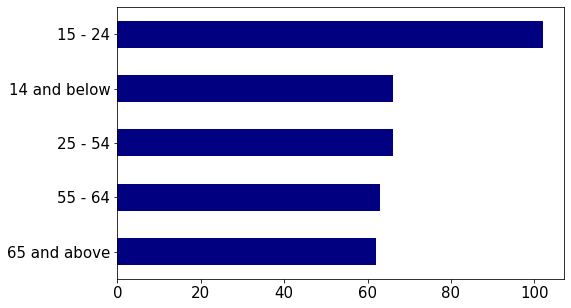

In [153]:
a['Age_Group'].value_counts().plot(kind='barh', figsize=[8,5], fontsize=15, color='navy').invert_yaxis()

In [154]:
df.head()

,UserID,Gender,Age Group,Top 6 most preferred dishes,laksa,Chili Crab,Char Kway Teow,hainanese chicken rice,Sliced Fish Soup,Fish and Chips,...,Roti Prata,Black Pepper Crab,Roti John,Cereal Prawn,Beef Kway Teow,Katong laksa,Sambal Stingray,Crab Bee Hoon Soup,Satay,sum
0,1,Female,15 - 24,"Sliced Fish Soup, Japanese Bento,Curry laksa, ...",0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,6
1,2,Male,15 - 24,"Hainanese Chicken Rice, Fish and Chips, Japane...",0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,6
2,3,Male,15 - 24,"Char Kway Teow, Hainanese Chicken Rice, Fish a...",0,0,1,1,0,1,...,1,0,1,0,0,0,0,0,0,6
3,4,Female,15 - 24,"Laksa , Hainanese Chicken Rice, Japanese Bento...",1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,5,Female,15 - 24,"Fish and Chips, Japanese Bento, Duck Rice, Hok...",0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,6


In [155]:
df["bow"]=df["Age Group"]+" "+df["Gender"]+' '+df[" Top 6 most preferred dishes"]

In [156]:
df["bow"]

0      15 - 24 Female Sliced Fish Soup, Japanese Bent...
1      15 - 24 Male Hainanese Chicken Rice, Fish and ...
2      15 - 24 Male Char Kway Teow, Hainanese Chicken...
3      15 - 24 Female Laksa , Hainanese Chicken Rice,...
4      15 - 24 Female Fish and Chips, Japanese Bento,...
                             ...                        
354    25 - 54 Female Laksa , Char Kway Teow, Hokkien...
355    25 - 54 Male Chili Crab, Duck Rice, Fish Head ...
356    15 - 24 Male Laksa , Hainanese Chicken Rice, F...
357    55 - 64 Female Laksa , Japanese Bento, Fish He...
358    14 and below Male Laksa , Hainanese Chicken Ri...
Name: bow, Length: 359, dtype: object

In [172]:
#print(tfidf_matrix_train )
print(tfidf_matrix_test)

In [182]:
age=int(input("please input your age"))

please input your age23


In [183]:
if (age<=14):
    ageggroup='14 and below'
elif ((age>=15) & (age<=24)):
    ageggroup='15 - 24'
elif (age>=25 & age<=54):
    ageggroup='25 - 54'
elif (age>=55 & age<=64):
    ageggroup='55 - 64'
else:
    ageggroup='65 and above'

In [184]:
print(ageggroup)

15 - 24


In [185]:
gender=input("please enter your gender")

please enter your gendermale


In [186]:
dish= input("please enter one dish")

please enter one dishHainanese Chicken Rice


In [187]:
inp=ageggroup + ' ' + gender + ' '+ dish

In [188]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix_train = tfidf_vectorizer.fit_transform(df['bow'])
tfidf_matrix_test = tfidf_vectorizer.transform([inp])
a=cosine_similarity(tfidf_matrix_train,tfidf_matrix_test)

In [191]:
index=np.argmax(a)
index

107

In [190]:
print('following are recommended dishes')
df[" Top 6 most preferred dishes"][index]

following are recommended dishes


'Laksa , Hainanese Chicken Rice, Chinese Economy Rice, Japanese Bento, Roti Prata, Satay'